#  Melanie Schwartz
DS 4033
Dr. Acosta
4/2/2024

In [2]:
# TODO: a) (10 pts.) Build a regression model with predictors (age, C(sex), bmi, childen,C(smoker), and, C(region)) to predict annual medical expenses for the patient. Report R-square, adjusted R-squared, and the regression coefficients.
import pandas as pd
import statsmodels.formula.api as smf

# Load CSV
df = pd.read_csv('insurance2.csv')  

# Define and fit the regression model
model = smf.ols('expenses ~ age + C(sex) + bmi + children + C(smoker) + C(region)', data=df).fit()

# Print the R-squared and Adjusted R-squared values
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")

# Print the coefficients
print("\nCoefficients:")
print(model.params)

R-squared: 0.7509
Adjusted R-squared: 0.7494

Coefficients:
Intercept                -11941.562461
C(sex)[T.male]             -131.352014
C(smoker)[T.yes]          23847.476695
C(region)[T.northwest]     -352.790096
C(region)[T.southeast]    -1035.595701
C(region)[T.southwest]     -959.305829
age                         256.839171
bmi                         339.289863
children                    475.688916
dtype: float64


In [10]:
# TODO: b) (10 pts.) On average how much more expensive is each additional children? How much medical expenses increase for each additional year of age?

# The average increase in expenses 
increase_per_child = model.params["children"]
increase_per_year_of_age = model.params["age"]

print(f"Each additional child increases annual medical expenses by: ${increase_per_child:.2f}")
print(f"Each additional year of age increases annual medical expenses by: ${increase_per_year_of_age:.2f}")

Each additional child increases annual medical expenses by: $475.69
Each additional year of age increases annual medical expenses by: $256.84


In [9]:
#  TODO: c) (10 pts.) As you did in HW2, create a binary variable BMI_ind equal to 1 if the patient BMI is at least 30 (for an obese patient), and equal to 0 (not obese) otherwise. Also, include a variable BMI_ind_smoker for the interaction between BMI_ind and smoker. Display the first five patients.
# Create a binary variable BMI_ind
df['BMI_ind'] = (df['bmi'] >= 30).astype(int)

# Create an interaction variable between BMI_ind and smoker
# Need to convert smoker to a binary variable for this purpose
df['smoker_yes'] = (df['smoker'] == 'yes').astype(int)
df['BMI_ind_smoker'] = df['BMI_ind'] * df['smoker_yes']

# Display the first five patients including the new variables
df.head()

,age,sex,bmi,children,smoker,region,expenses,BMI_ind,smoker_yes,BMI_ind_smoker
0,19,female,27.9,0,yes,southwest,16884.92,0,1,0
1,18,male,33.8,1,no,southeast,1725.55,1,0,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,0
3,33,male,22.7,0,no,northwest,21984.47,0,0,0
4,32,male,28.9,0,no,northwest,3866.86,0,0,0


In [13]:
# TODO: d) (10 pts.) Build a regression model with the original and new predictors. Report R-square, adjusted R- squared, and the regression coefficients.

# Original and new predictors
model_new = smf.ols('expenses ~ age + C(sex) + bmi + children + C(smoker) + C(region) + BMI_ind + BMI_ind_smoker', data=df).fit()

# New Model
new_model = {
    "R-squared": model_new.rsquared,
    "Adjusted R-squared": model_new.rsquared_adj,
    "Coefficients": {
        "Intercept": model_new.params['Intercept'],
        "Sex (Male)": model_new.params['C(sex)[T.male]'],
        "Smoker (Yes)": model_new.params['C(smoker)[T.yes]'],
        "Region (Northwest)": model_new.params['C(region)[T.northwest]'],
        "Region (Southeast)": model_new.params['C(region)[T.southeast]'],
        "Region (Southwest)": model_new.params['C(region)[T.southwest]'],
        "Age": model_new.params['age'],
        "BMI": model_new.params['bmi'],
        "Children": model_new.params['children'],
        "BMI_ind": model_new.params['BMI_ind'],
        "BMI_ind_smoker": model_new.params['BMI_ind_smoker']
    }
}

print("Model Summary:")
print(f"R-squared: {new_model['R-squared']:.4f}")
print(f"Adjusted R-squared: {new_model['Adjusted R-squared']:.4f}")
for key, value in new_model['Coefficients'].items():
    print(f"{key}: {value:.4f}")


Model Summary:
R-squared: 0.8639
Adjusted R-squared: 0.8628
Intercept: -4740.6822
Sex (Male): -491.1295
Smoker (Yes): 13402.2873
Region (Northwest): -266.7997
Region (Southeast): -824.5730
Region (Southwest): -1223.8697
Age: 263.2428
BMI: 114.8282
Children: 520.4738
BMI_ind: -863.2546
BMI_ind_smoker: 19794.2644


In [16]:
# TODO: e) (10 pts.) On average how much more expensive is a smoker than a non-smoker patient?

# Additional expense of being a smoker 
additional_smoker_expense = model_new.params['C(smoker)[T.yes]']

print(f"Being a smoker is on average an increase of ${additional_smoker_expense:.2f} annually vs. a non-smoker.")

Being a smoker is on average an increase of $13402.29 annually vs. a non-smoker.


In [29]:
# TODO: f) (10 pts.) How much more expensive are obese smokers than non-smoker patients that are not obese?
# Fit new model
model_with_interaction = smf.ols(model_new.params, data=df).fit()

# Coefficients/interaction for smoking, obesity
coef_with_interaction = model_with_interaction.params
coef_smoker_yes = coef_with_interaction["C(smoker)[T.yes]"]
coef_BMI_ind = coef_with_interaction["BMI_ind"]
coef_BMI_ind_smoker = coef_with_interaction["BMI_ind_smoker"]

# Total additional cost for an obese smoker
total_cost_obese_smoker = coef_smoker_yes + coef_BMI_ind + coef_BMI_ind_smoker

print(f"Total increase in cost for obese smokers compared to non-smokers/not obese: ${total_cost_obese_smoker:.2f}")

Total increase in cost for obese smokers compared to non-smokers/not obese: $32333.30


In [32]:
# TODO:  g) (10 pts.) Use the model to predict the expense of the patients in the original dataset. Store those predictions in a vector yhat. Add a column to the dataframe with those predictions. Find and report the correlation of the actual expenses with the predicted expenses.
# Using the model to predict expenses
df['yhat'] = model_with_interaction.predict(df)

# Calculating the correlation between actual expenses and predicted expenses
correlation_actual_predicted = df['expenses'].corr(df['yhat'])

# Report the correlation
correlation_actual_predicted

0.9294463115745288

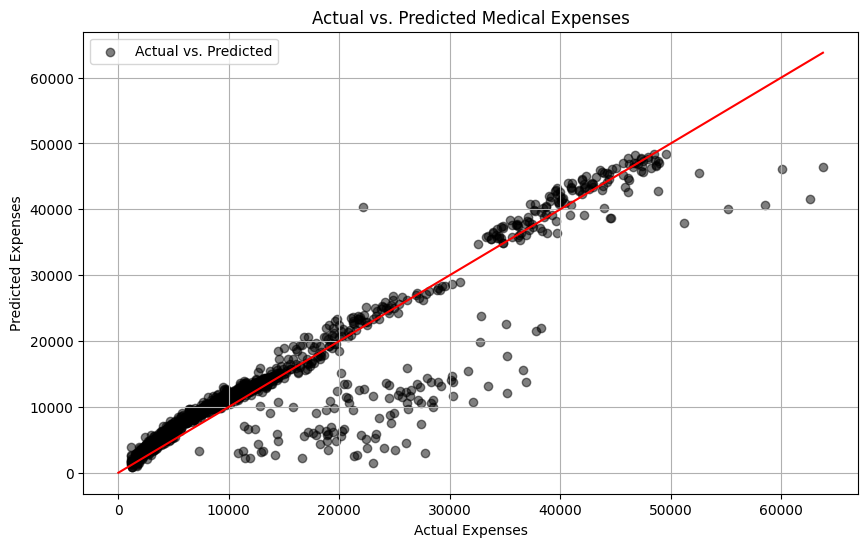

In [39]:
# TODO: h) (20 pts.) Make a scatterplot (black color) of the actual expenses (x-axis) and the predicted expenses (y-axis). Add a 45-degree line (red color).

import matplotlib.pyplot as plt

# Scatterplot of the actual vs. predicted expenses
plt.figure(figsize=(10, 6))
plt.scatter(df['expenses'], df['yhat'], color='black', alpha=0.5, label='Actual vs. Predicted')

# Adding a 45-degree line
max_expense = max(df['expenses'].max(), df['yhat'].max())
plt.plot([0, max_expense], [0, max_expense], color='red')

# Labeling the plot
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs. Predicted Medical Expenses')
plt.legend()
plt.grid(True)

plt.show()



In [41]:
# TODO: i) (10 pts.) Predict the annual medical expenses of a 30-year old, male, obese, smoker, with two children in the Northeast.
